# Leitura Dataset

In [1]:
from pandas import read_csv
series = read_csv('./champagne_sales.csv')

### Exploração e Resumo dos dados

In [2]:
series.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


In [3]:
series.head()

,Month,Sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


### Visualizando dados

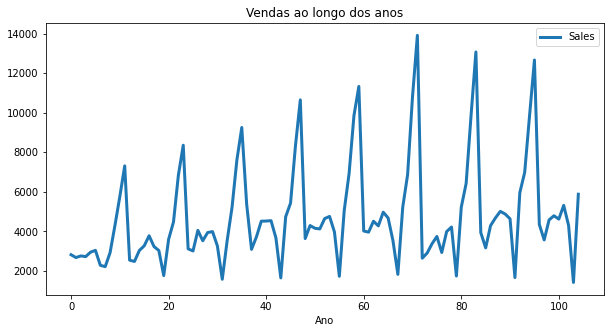

In [4]:
import matplotlib.pyplot as plt
series.plot(figsize=(10,5),
            linewidth=3,
            fontsize=10,
            title="Vendas ao longo dos anos")
plt.xlabel('Ano', fontsize=10);

# Projeto Prevendo Dados Futuros

### Separando os dados para treino, teste e validação

Vamos separar em dois arquivos físicos:
- **dataset.csv**: Dados de 1964 a setembro de 1971
- **validation.csv**: Dados de Outubro de 1971 a Outubro de 1972 ( 1 ano de vendas)

In [5]:
# Pega todos os dados menos os 12 últimos meses
split_point = len(series) - 12

In [6]:
# define que a variável dataset vai conter linhas até o split_point
dataset = series[0:split_point]

In [7]:
# define que a variável validation terá os dados do split_point em diante
validation = series[split_point:]

In [8]:
#imprime o tamanho dos conjuntos
print(f"Dataset {len(dataset)}, Validation {len(validation)} ")

Dataset 93, Validation 12 


In [9]:
#escreve para o disco
dataset.to_csv('./dataset.csv')

In [10]:
#escreve para o disco
validation.to_csv('./validation.csv')

### Análise de Dados

In [11]:
import pandas as pd
series = pd.read_csv('./dataset.csv')

### Facebook Prophet

- Biblioteca criada pelo Facebook com o objetivo de ser usada na rede social.
- Motivação: Facilitar a criação de modelos sem necessariamente ter experts para isso.
- Focada em modelar sazonalidades, efeitos de feriados e tratar missing values.

In [ ]:
!pip install fbprophet

In [13]:
# importa o Prophet
from fbprophet import Prophet

In [14]:
# ds: features temporais
# y: valores a serem preditos

dataframe = pd.DataFrame({'ds': dataset.Month, 'y': dataset.Sales})

In [15]:
dataframe

,ds,y
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946
...,...,...
88,1971-05,5010
89,1971-06,4874
90,1971-07,4633
91,1971-08,1659


In [16]:
#DataFrame do Prophet
dataframe.head()

,ds,y
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [21]:
# Instância do objeto Prophet
model = Prophet()

In [22]:
# Gerando o modelo
  # Obtenção de um modelo treinado
model.fit(dataframe)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [23]:
# Gerando dataframe com dados futuros
futuro = model.make_future_dataframe(periods= 12, freq='M')

# serão gerados 12 anos de dados futuros

In [24]:
futuro

,ds
0,1964-01-01
1,1964-02-01
2,1964-03-01
3,1964-04-01
4,1964-05-01
...,...
100,1972-04-30
101,1972-05-31
102,1972-06-30
103,1972-07-31


In [25]:
# prevendo valores para dados futuros
saida = model.predict(futuro)

In [26]:
saida[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
98,1972-02-29,4356.302887,3437.440286,5265.609763
99,1972-03-31,5121.614426,4180.688371,6176.629073
100,1972-04-30,5155.469804,4154.560870,6165.612783
101,1972-05-31,5427.420282,4444.618749,6330.503471
102,1972-06-30,5131.731087,4184.451152,6053.183330
103,1972-07-31,2110.803428,1125.382644,3019.938234
104,1972-08-31,6046.660547,5098.693693,7057.854459


### Validando o modelo com o Prophet

In [27]:
# dataset de validação
validation_df = pd.DataFrame({'ds': validation.Month})

In [28]:
# dados temporais
validation_df['ds']

93     1971-10
94     1971-11
95     1971-12
96     1972-01
97     1972-02
98     1972-03
99     1972-04
100    1972-05
101    1972-06
102    1972-07
103    1972-08
104    1972-09
Name: ds, dtype: object

In [29]:
# aplicando o modelo do prophet
saida = model.predict(validation_df)

In [30]:
saida[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
5,1972-03-01,5157.687395,4210.539826,6152.505779
6,1972-04-01,4886.316086,3891.511724,5851.254165
7,1972-05-01,5232.185280,4232.037253,6172.304290
8,1972-06-01,5128.876435,4160.226184,6122.249870
9,1972-07-01,4381.208289,3487.821938,5348.459044
10,1972-08-01,3303.765142,2364.434263,4229.548979
11,1972-09-01,5354.145340,4395.514049,6315.963066


In [31]:
# Dados de validação
validation

,Month,Sales
93,1971-10,6981
94,1971-11,9851
95,1971-12,12670
96,1972-01,4348
97,1972-02,3564
98,1972-03,4577
99,1972-04,4788
100,1972-05,4618
101,1972-06,5312
102,1972-07,4298


In [32]:
# Avaliando os resultados
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(validation.Sales, saida.yhat))
print('Test RMSE: %.3f' %rmse)

Test RMSE: 754.079


### Prevendo o Futuro

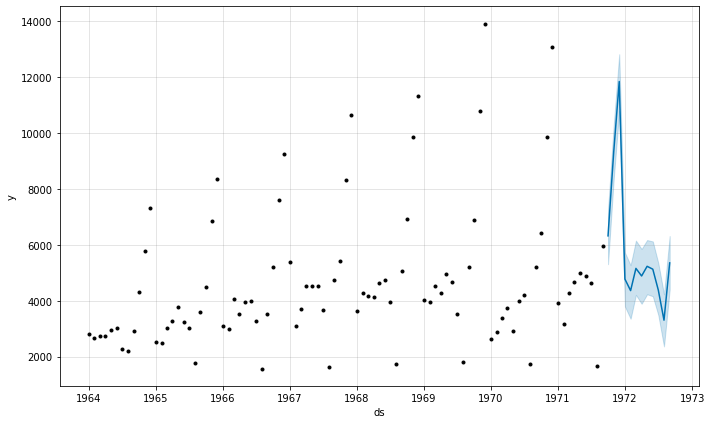

In [33]:
# A linha azul representa as previsões
figura = model.plot(saida)

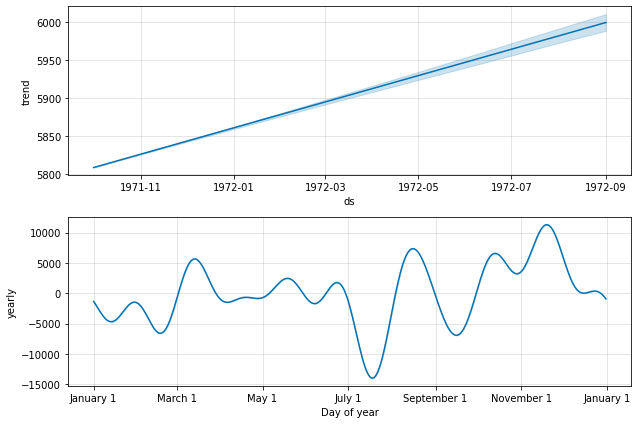

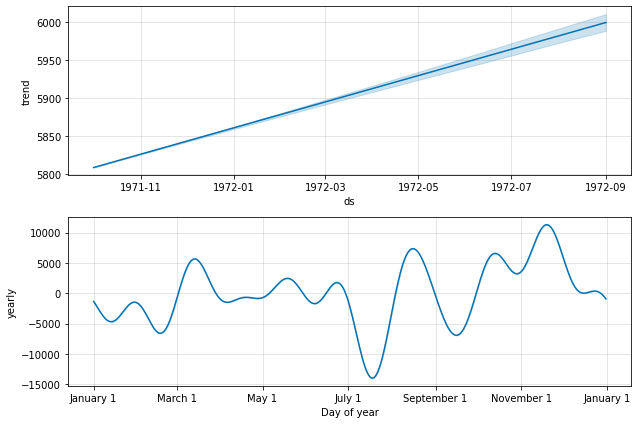

In [34]:
model.plot_components(saida)

# Tunning Prophet

- `seasonality_mode`: Este parâmetro indica como seus componentes de sazonalidade devem ser integrados às previsões. O valor padrão é `additive`, com o parâmetro `multiplicative` sendo a outra opção. Você deve usar o  aditivo quando sua tendência de sazonalidade for "constante" durante todo o período. Por exemplo, quando você deseja que seu impacto no crescimento da tendência anual seja o mesmo que em 2010 e 2018. Isso é aplicável nos dados em que a mudança de tendência parece permanecer constante, por exemplo, o número de pessoas que vivem em uma cidade pequena. Isso ocorre porque não esperamos que o crescimento aumente repentinamente em milhões, porque não há infraestrutura para isso. Por outro lado, quando queremos prever a quantidade de pessoas que vivem em uma cidade em crescimento, o número anual de tendências pode ser muito mais importante nos últimos anos, pois a infraestrutura existe. A taxa de crescimento populacional pode ser muito mais rápida do que teria sido nos primeiros anos. Em um caso como esse, você usará multiplicativo para aumentar a importância das sazonalidades ao longo do tempo. 

- `seasonality_prior_scale`. Este parâmetro novamente permitirá que suas sazonalidades sejam mais flexíveis. É possível definir os parâmetros `anual_seasonality`, `Weekly_seasonality` e `daily_seasonality` separadamente ou ainda adiciona sua própria configuração de sazonalidade.

In [35]:
from fbprophet import Prophet

In [36]:
import pandas as pd
dataframe = pd.DataFrame({'ds': dataset.Month, 'y': dataset.Sales})

In [37]:
dataframe

,ds,y
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946
...,...,...
88,1971-05,5010
89,1971-06,4874
90,1971-07,4633
91,1971-08,1659


### Alterando o modo sazonalidade

In [38]:
model = Prophet(seasonality_mode='multiplicative')

In [39]:
model.fit(dataframe)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [40]:
validation_df = pd.DataFrame({'ds': validation.Month})

In [41]:
saida = model.predict(validation_df)

In [42]:
# Avaliando os resultados
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(validation.Sales, saida.yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 499.768


### Alterando o tipo de Sazonalidade

In [43]:
# cria um modelo com sazonalidade  multiplicativa e desligando a sazonalidade diária
model = Prophet(seasonality_mode='multiplicative', daily_seasonality=False, )

In [44]:
model.fit(dataframe)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [45]:
# imprime a sazonalidade habilitada
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'multiplicative',
               'condition_name': None})])

In [46]:
# cria o dataframe de validação
validation_df = pd.DataFrame({'ds': validation.Month})

In [47]:
# Avaliando os resultados
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(validation.Sales, saida.yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 499.768
